In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True) 

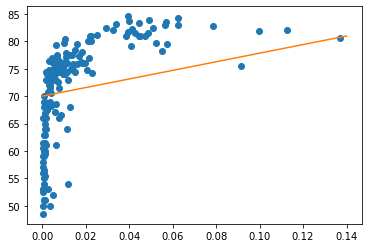

In [4]:
#6:  aus Aufgabe 6 letzter Woche --> die Linearfunktion mit einem Polynom ersetzt.


def linearGraphApproximation(x):

    #y = 78.57 * x + 70
    y = 70 * pow(x, 0) + 78.57 * pow(x, 1);
    
    return y
    

worldLifespan = nations[:,4]
worldGdpPerPerson = nations[:,3] / nations[:,6]

plt.plot(worldGdpPerPerson, worldLifespan,  'o')    
    
plt.plot([0, 0.14], [linearGraphApproximation(0), linearGraphApproximation(0.14)])

plt.show()

[   67.11889558   415.86397018 -1886.10664651]
6.802072660040747


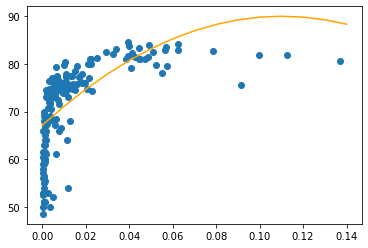

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True) 


# Funktion zur Berechnung des root square error
def getRMSE (werte, erwarteteWerte):
    quadratischerFehlerSum =  np.sum(np.power((erwarteteWerte) - werte, 2))
    mse = quadratischerFehlerSum / len(werte)
    rmse = np.sqrt(mse)
    return rmse
    
# Polynomfunktion zweiten Grades mit angegebenen Koeffizienten zurückgeben
def getPolynomfunktion(x, k0, k1, k2):
    y = (k0 * pow(x, 0)) + (k1 * pow(x, 1)) + (k2 * pow(x, 2))
    return y


# Die tatsächlichen Werte zum Verhältnis der World Lifespan zum World GDP per Person plotten
worldGdpPerPerson = nations[:,3] / nations[:,6]
worldLifespan = nations[:,4]
plt.plot(worldGdpPerPerson, worldLifespan, 'o')


bippp = np.expand_dims(worldGdpPerPerson, axis=0)
p = np.expand_dims(np.arange(0,3), axis=1)
bippp2 = np.power(bippp, p)

 
#Initialisierung der Variablen der kleinsten RMSE und der optimalsten Koeffizienten, smallestRMSE auf unendlich
smallestRMSE = float("inf")
besteKoeffizienten = 0

for i in range(0, 100001, 1): 
    k0 = random.uniform(0,101)
    k1 = random.uniform(-1000, 1000)
    k2 = random.uniform(-2000, 2000)
    
    #Berechnung der Werte der jeweiligen Polynomfunktion
    k = np.expand_dims(np.array([k0,k1,k2]), axis=1)
    y = np.matmul(bippp2.transpose(), k)
    y = np.squeeze(y)
    
    rmse = getRMSE(y, worldLifespan) 
    #print(rmse)
    
    if(rmse < smallestRMSE):
        smallestRMSE = rmse
        besteKoeffizienten = np.array([k0, k1, k2])

# x Achse plotten und passend skalieren
x = np.arange(0.0, 0.15, 0.01)                        
plt.plot(x, getPolynomfunktion(x, besteKoeffizienten[0], besteKoeffizienten[1], besteKoeffizienten[2]), color="orange")
print(besteKoeffizienten)
print(smallestRMSE)
plt.show()

In [ ]:
# Die geringste MSE: 6.802072660040747 wurde in dem von mir gewählten Wertebereich mit 
# den Koeffizienten 67.03224103, 415.86397018 & -1886.10664651 erzielt